In [17]:
import openslide, os.path, glob
import numpy as np
import scipy.misc
from openslide import open_slide, ImageSlide
from PIL import Image

In [54]:
# Image data 를 뽑아오는 함수
def getPixelData(slide):
    name = slide.associated_images
    Factors = slide.level_downsamples
    [w,h] = slide.dimensions
    
    # 이미지 크기
    size_x = int(w * (Factors[0] / Factors[2]))
    size_y = int(h * (Factors[0] / Factors[2]))
    
    # or 
    # size_x = float(slide.level_dimensions[-1][0])
    # size_y = float(slide.level_dimensions[-1][1])
    
    region = np.array(slide.read_region((0,0), 2, (size_x, size_y)))
    return region

In [45]:
def covJPG(svs):
    # Original size of the image
    ImgMaxSizeX_orig = float(svs.level_dimensions[-1][0]) # 가로
    ImgMaxSizeY_orig = float(svs.level_dimensions[-1][1]) # 세로
    
    print("image info:")
    print(ImgMaxSizeX_orig, ImgMaxSizeY_orig)
        
    region = getPixelData(svs)
    print(region)
    
    img = Image.fromarray(region)
    img = img.convert('RGB')
    img.save('result.jpeg')
    
    return

/data/Genomic/svs_sample/TCGA-13-1511-01A-01-TS1.4fb08454-15fa-40f8-9d21-d7b75fa68fbe.svs
image info:
2750.0 2219.0
[[[245 245 245 255]
  [245 245 245 255]
  [245 245 245 255]
  ...
  [245 245 245 255]
  [245 245 245 255]
  [245 245 245 255]]

 [[245 245 245 255]
  [245 245 245 255]
  [245 245 245 255]
  ...
  [245 245 245 255]
  [245 245 245 255]
  [245 245 245 255]]

 [[245 245 245 255]
  [245 245 245 255]
  [245 245 245 255]
  ...
  [245 245 245 255]
  [245 245 245 255]
  [245 245 245 255]]

 ...

 [[245 245 244 255]
  [245 245 244 255]
  [245 245 244 255]
  ...
  [241 241 241 255]
  [241 241 241 255]
  [241 241 241 255]]

 [[243 244 244 255]
  [243 244 244 255]
  [243 244 244 255]
  ...
  [241 241 241 255]
  [241 241 241 255]
  [241 241 241 255]]

 [[245 246 246 255]
  [245 246 246 255]
  [245 246 246 255]
  ...
  [239 239 239 255]
  [239 239 239 255]
  [239 239 239 255]]]


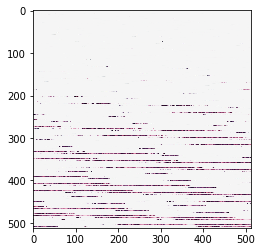

(512, 512, 4)


In [60]:
import matplotlib.pyplot as plt

# 모든 svs 파일을 가져오자.
path = '/data/Genomic/svs_sample'
ext = '*.svs'

# Image List
im_list = []
for f in glob.glob(os.path.join(path, ext)):
    print(f)
    slide = open_slide(f)
    covJPG(slide)
    pixel = np.resize(getPixelData(slide), (512, 512, 4))
    try:
        plt.imshow(pixel)
        plt.show()
        print(pixel.shape)
        break
    except:
        print('err')

In [18]:
print(im_list[0])

OpenSlide('/data/Genomic/svs_sample/TCGA-13-1511-01A-01-TS1.4fb08454-15fa-40f8-9d21-d7b75fa68fbe.svs')
